In [1]:
import sys
sys.path.append("/mnt/c/Users/dambr/Desktop/AstroCosmoComputational/Students/Anna_DAmbrosio/")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import your integration methods
from pyACC.Calculus import *

# Import integration class
from pyACC.cosmology import *

from pyACC.clustering import *

import scipy as sp
from scipy import interpolate

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))

In [2]:
# creation of the grid
N = 10
L = 9
x_array = np.linspace(0,L,N)
y_array = np.linspace(0,L,N)
z_array = np.linspace(0,L,N)

<function matplotlib.pyplot.show(close=None, block=None)>

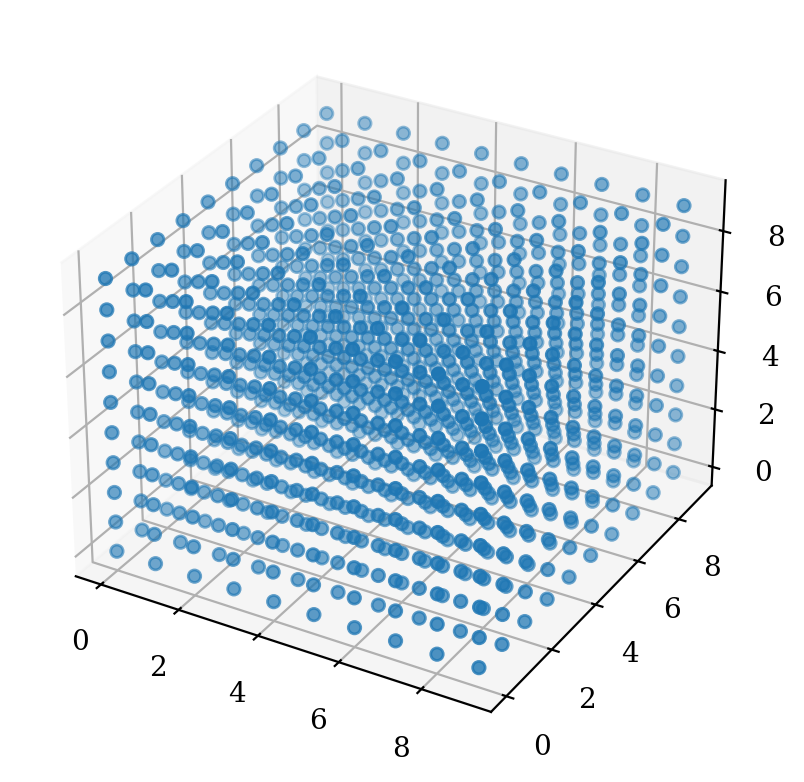

In [3]:
# plot of the grid in configuration space
X, Y, Z = np.meshgrid(x_array, y_array, z_array)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X, Y, Z)
plt.show

In [4]:
# creation of uniform grid
grid = np.ones((x_array.size, y_array.size, z_array.size))

In [5]:
# fourier transform of the uniform grid
FT_grid = np.fft.fftn(grid)

In [6]:
# calculation of the power spectrum
P = np.real(FT_grid*np.conjugate(FT_grid))*L**3

<function matplotlib.pyplot.show(close=None, block=None)>

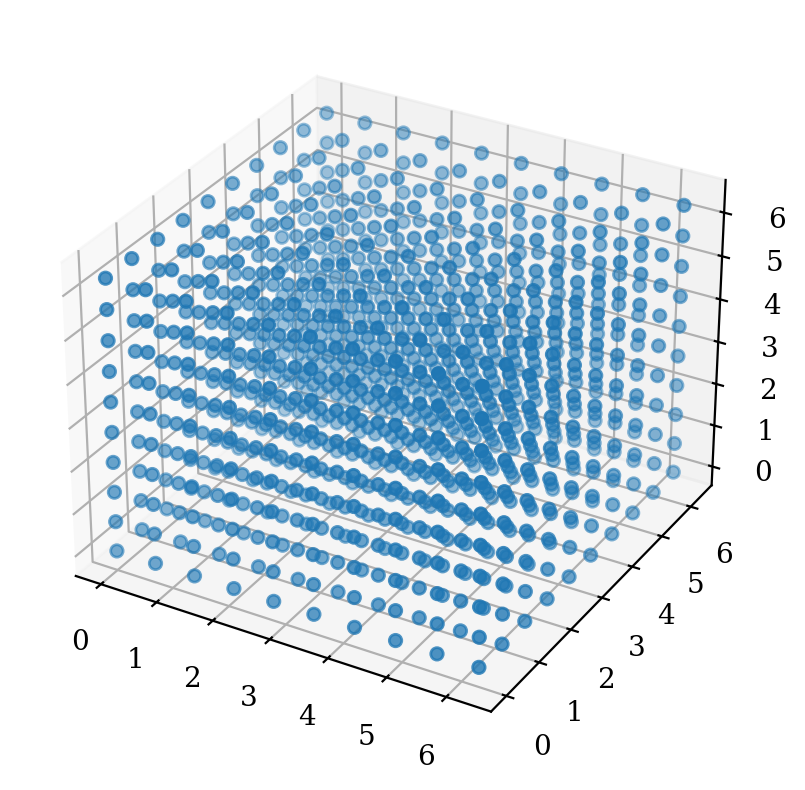

In [7]:
# grid in fourier space
n_array = np.linspace(0,L,N)
k_x = (2*np.pi/L)*n_array
k_y = (2*np.pi/L)*n_array
k_z = (2*np.pi/L)*n_array

K_X ,K_Y, K_Z = np.meshgrid(k_x, k_y, k_z)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(K_X, K_Y, K_Z)
plt.show

In [8]:
# calculation of k module on the grid in fourier space
grid_module = np.sqrt(K_X**2 + K_Y**2 + K_Z**2)

In [9]:
# definition of the binning of k
k_min = np.min(grid_module)
k_max = np.max(grid_module) + 1

k_n = 20
k_array = np.linspace(k_min, k_max, k_n)

In [10]:
# loop to fill collect in bins the values of the power spectrum, based on the value of k
k_flatten = grid_module.flatten()
P_flatten = P.flatten()

P_binned = [[] for i in range(k_n)]

for i, kk in enumerate(k_flatten):
    for j in range(k_n-1):
        
        if k_array[j]<=kk<k_array[j+1]:
            P_binned[j].append(P_flatten[i])

In [11]:
# check if i collected all the points in P_binned (must be equal to the size of P_flatten)
len_tot = 0.0
for i in range(k_n):
    len_tot = len_tot + len(P_binned[i])
print(len_tot)

1000.0


In [12]:
# calculation of P(k) as a mean on every bin of P_binned
P_k = []
for i in range(k_n):
    P_k.append(np.mean(P_binned[i]))

/home/anna/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


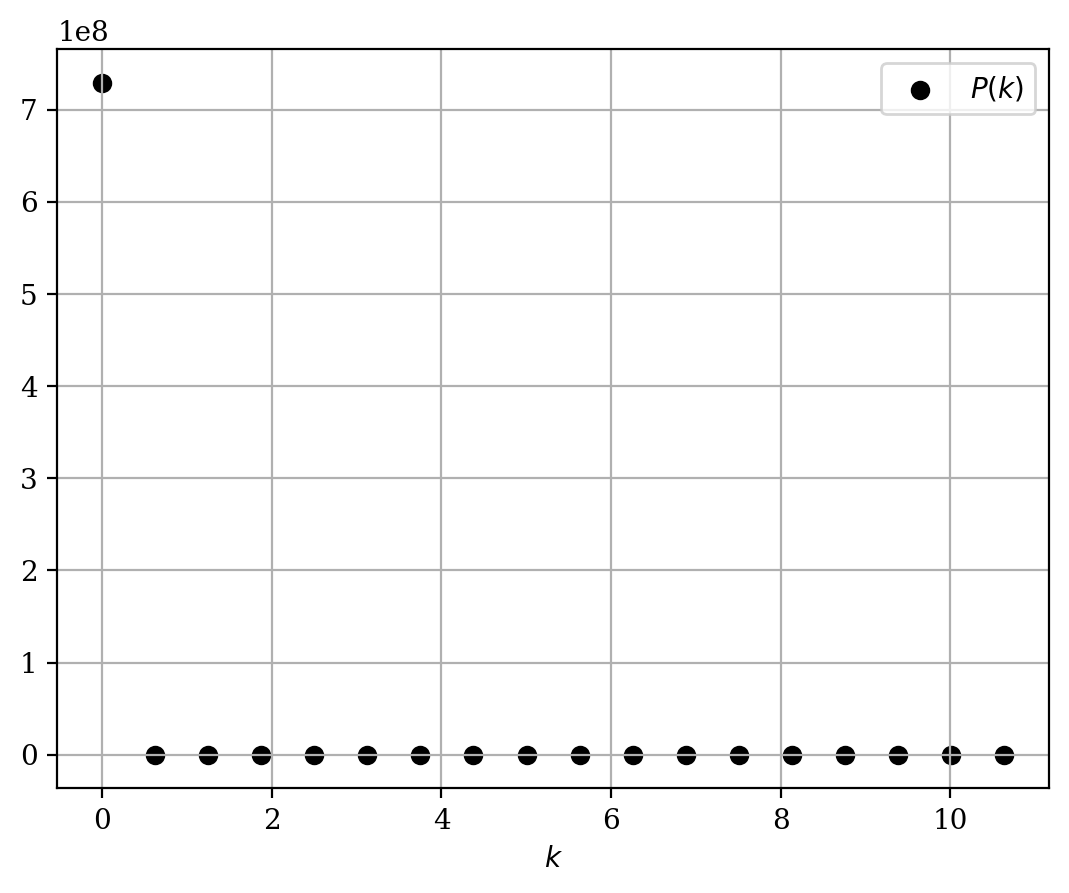

In [13]:
# plot of the interpolated function and the theoretical one:
plt.scatter(k_array, P_k, label=r'$P(k)$', color='black')

plt.grid(True)
plt.xlabel(r'$k$');
plt.legend()

### Using module 'clustering'

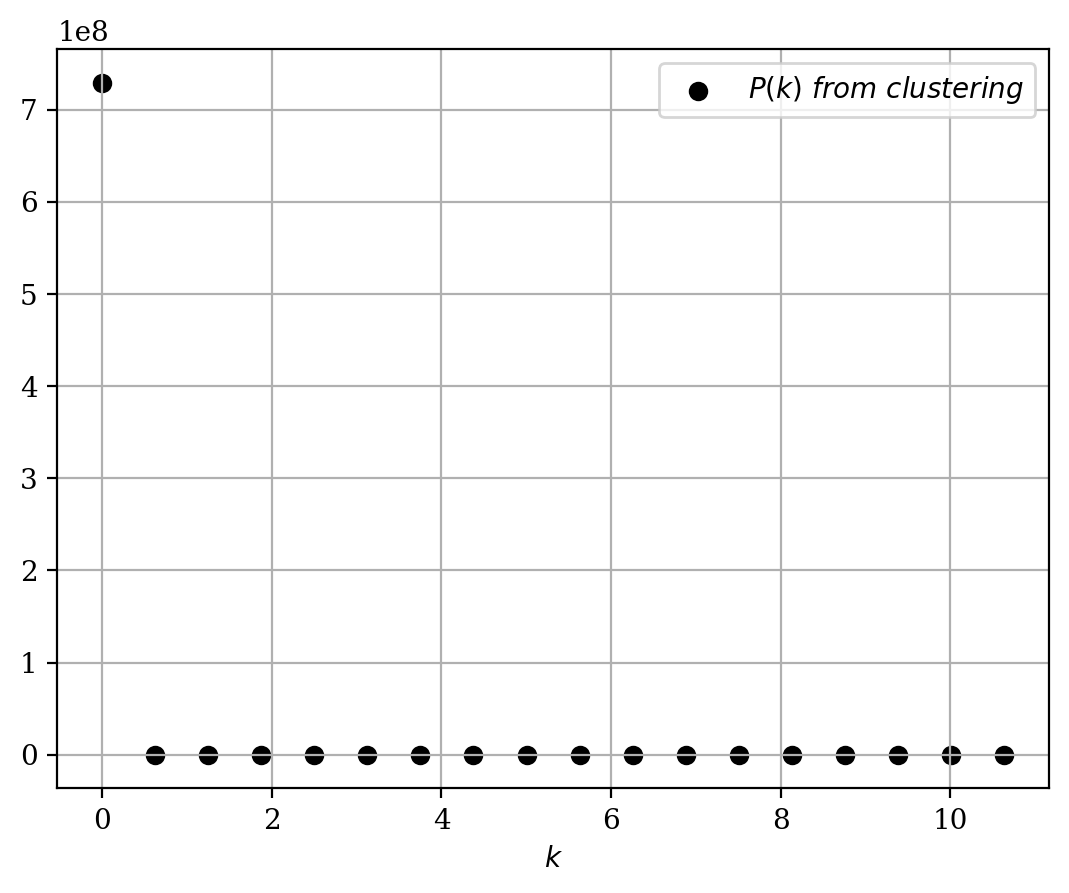

In [14]:
# calculation of power spectrum using the module 'clustering'
k_array_clusetring, P_k_clustering = PowerSpectrum(grid, L, k_n)

plt.scatter(k_array_clusetring, P_k_clustering, label=r'$P(k) \ from \ clustering$', color='black')

plt.grid(True)
plt.xlabel(r'$k$');
plt.legend()


### With random 3D points

In [15]:
# creation of empty grid
size = 50
N_bin = 25
spacing = size/N_bin

xgrid = np.arange(0, size+spacing, spacing)
ygrid = np.arange(0, size+spacing, spacing)
zgrid = np.arange(0, size+spacing, spacing)

In [16]:
# initialization of grid that will be filled with random points
pdf = np.zeros((N_bin+1, N_bin+1, N_bin+1))

In [17]:
# generation of 3D random points
N = 100000
dim = 3
data = np.random.uniform(0,size,(N,dim))

In [18]:
for i in range(N):
    datax = data[i,0]
    datay = data[i,1]
    dataz = data[i,2]

    idx = int(datax/spacing)
    idy = int(datay/spacing)
    idz = int(dataz/spacing)

    if (datax/spacing - int(datax/spacing)) < 0.5:
        idx = int(datax/spacing) + 1

    if (datay/spacing - int(datay/spacing)) < 0.5:
        idy = int(datay/spacing) + 1

    if (dataz/spacing - int(dataz/spacing)) < 0.5:
        idz = int(dataz/spacing) + 1

    pdf[idx, idy, idz] = pdf[idx, idy, idz] + 1

pdf_norm = pdf/N

In [19]:
k_n = 10
k, pk = PowerSpectrum(pdf_norm, size, k_n=k_n)

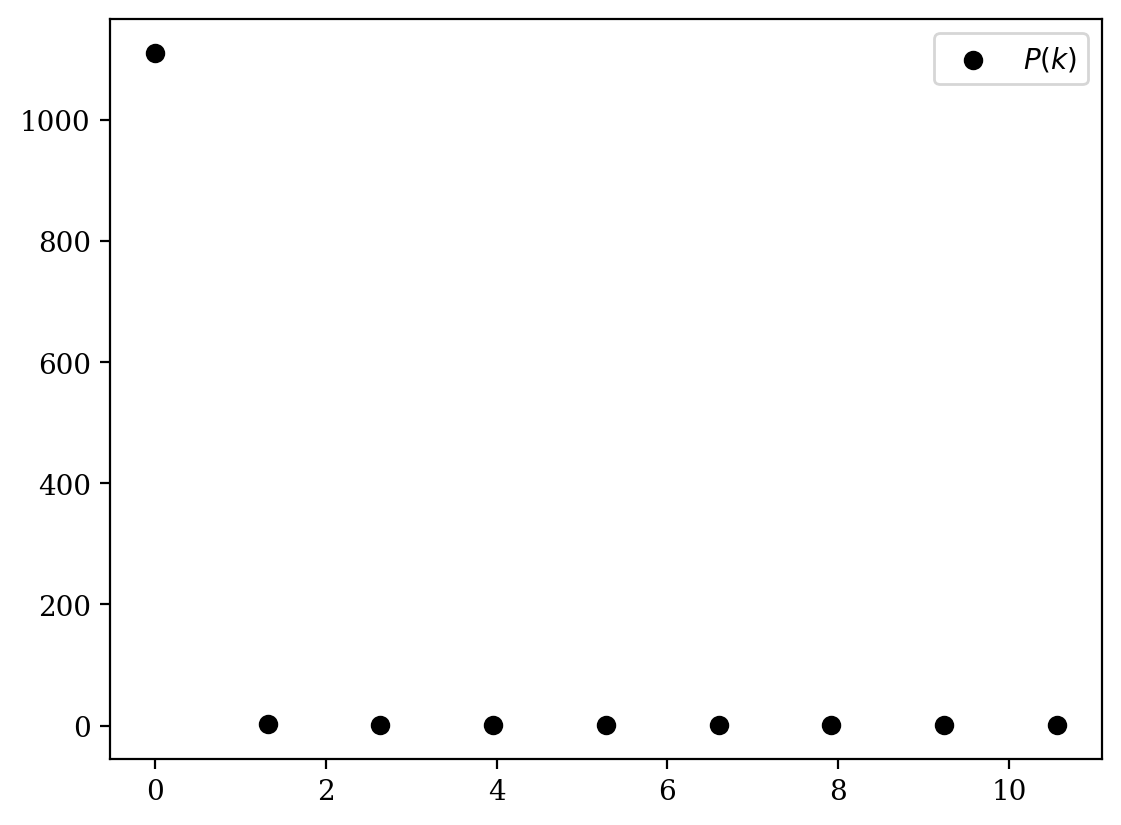

In [20]:
plt.scatter(k, pk, label=r'$P(k)$', color='black')
plt.legend()

# with our method

In [21]:
pdf_norm_method = inter_grid(data, size, N_bin)
k_method, pk_method = PowerSpectrum(pdf_norm_method, size, k_n=k_n)

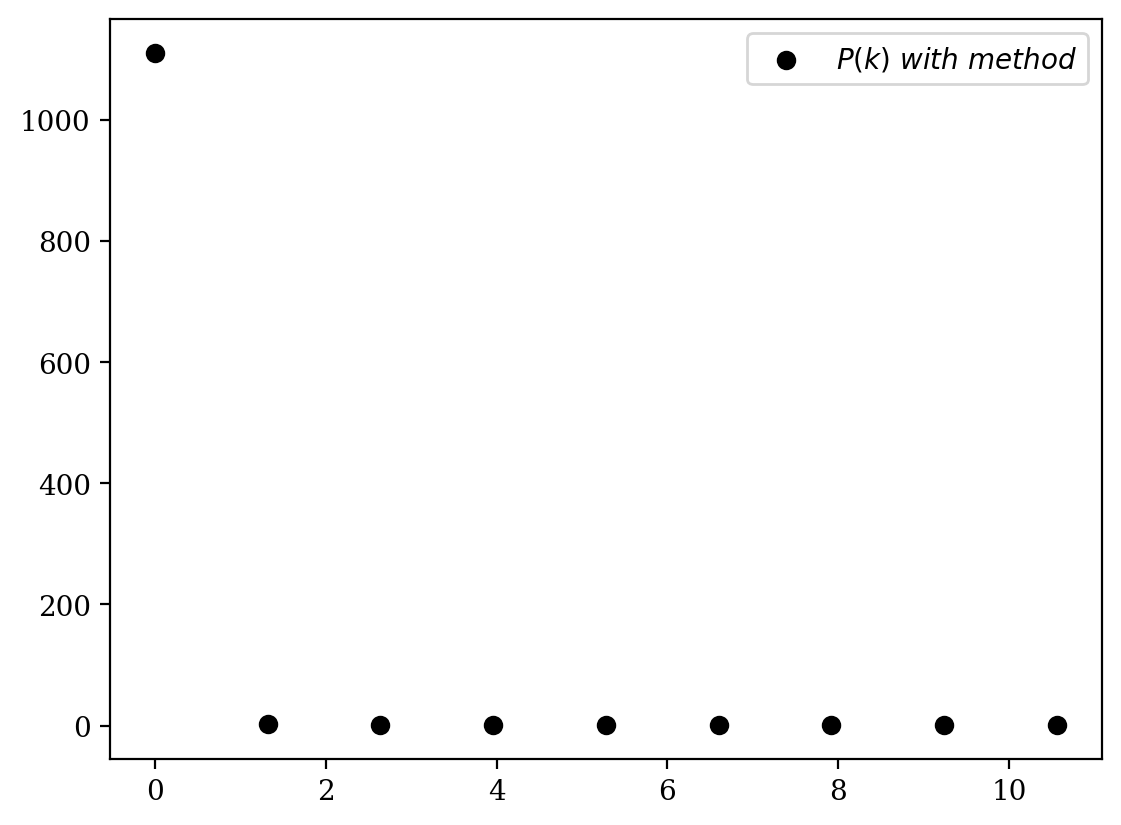

In [22]:
plt.scatter(k_method, pk_method, label=r'$P(k) \ with \ method$', color='black')
plt.legend()

## With points extracted with gaussian distribution

In [23]:
N_points = 100000
dim = 3
data_g = np.random.normal(size/2,0.5,(N_points,dim))

In [28]:
data_g.min()

22.601803585279335

In [24]:
pdf_norm_g = inter_grid(data_g, size, N_bin)

In [25]:
k_g, pk_g = PowerSpectrum(pdf_norm_g, size, k_n=k_n)

/home/anna/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


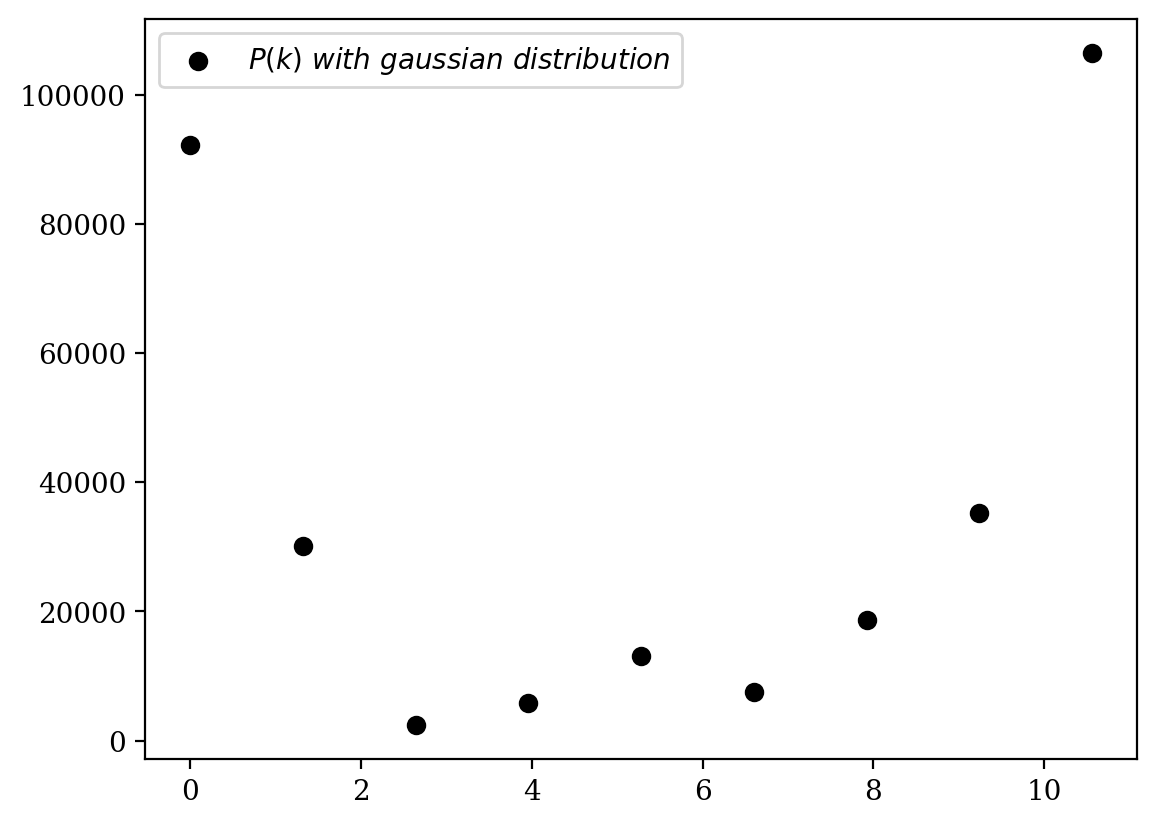

In [26]:
plt.scatter(k_g, pk_g, label=r'$P(k) \ with \ gaussian \ distribution$', color='black')
plt.legend()